# 6 - Charting Data from the internet

Following the matplotlib tutorial by sentdex.

Link: https://www.youtube.com/watch?v=q7Bo_J8x_dw&list=PLQVvvaa0QuDfefDfXb9Yf0la1fPDKluPF

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import urllib
import matplotlib.dates as mdates

#### Let's have a look at AAPL

No handles with labels found to put in legend.


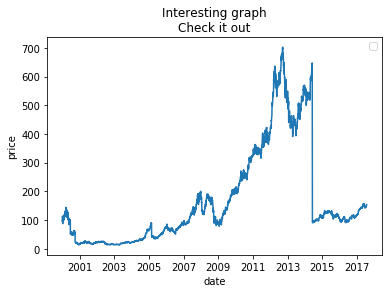

In [5]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

def graph_data():
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    
    stock_data = []
    split_source = source_code.split('\n')
    
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'Volume' not in line:
                stock_data.append(line)
    
    date, openp, highp, lowp, closep, adjustedp, volume = np.loadtxt(stock_data,
                                                                     delimiter=',',
                                                                     unpack=True,
                                                                     converters={0: bytespdate2num('%Y-%m-%d')})
    plt.plot_date(date, closep, '-')
        
    plt.xlabel('date')
    plt.ylabel('price')
    plt.title('Interesting graph\nCheck it out')
    plt.legend()
    plt.show()

graph_data()    